<a href="https://colab.research.google.com/github/koga25/projeto-metodos-numericos/blob/main/Projeto_M%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipe

1. Lucas Vinícius Araújo da Silva (lvas)
2. Nicolas Cavalcanti de Brito Barros (ncbb)
3. Mateus Galdino de Lima Guilherme (mglg)
4. Hiago Rafael Nunes (hrns)

# Resumo

Esse projeto visa projetar um modelo para prever a recuperação da população de uma espécie em risco. Para isso, nós utilizamos a equação Lotka-Volterra como base ao desenvolver o nosso modelo.

# Introdução e Objetivos

Com o passar do tempo, cada vez mais espécies estão entrando em risco de extinção, a preocupação com a restauração dessas populações em risco é um dos problemas mais sérios na área ecológica mundial. Independente da espécie ser Carnívora ou Herbívora, para termos uma projeção do aumento ou diminuição desses grupos é necessário levar em conta a dinâmica que sempre é encontrada na natureza, o sistema Predador-Presa e o consequente aumento e diminuição paralelo das populações entre esses dois grupos.

Nesse projeto o nosso primeiro objetivo é modelar uma equação para a população de tigres em Nepal e comparar o resultado com os dados reais de tigres que foram novamente introduzidas com sucesso ao seu habitat natural. Nosso segundo objetivo é projetar o crescimento e decrescimento dessa população ao longo do tempo. Para isso, achamos algumas opções durante a nossa pesquisa sobre o assunto. A equação que decidimos escolher é a equação de Lotka-Volterra, uma equação criada na época de 1920, onde modela o comportamento de de um sistema de populações predador-presa.


# Mapa Mental
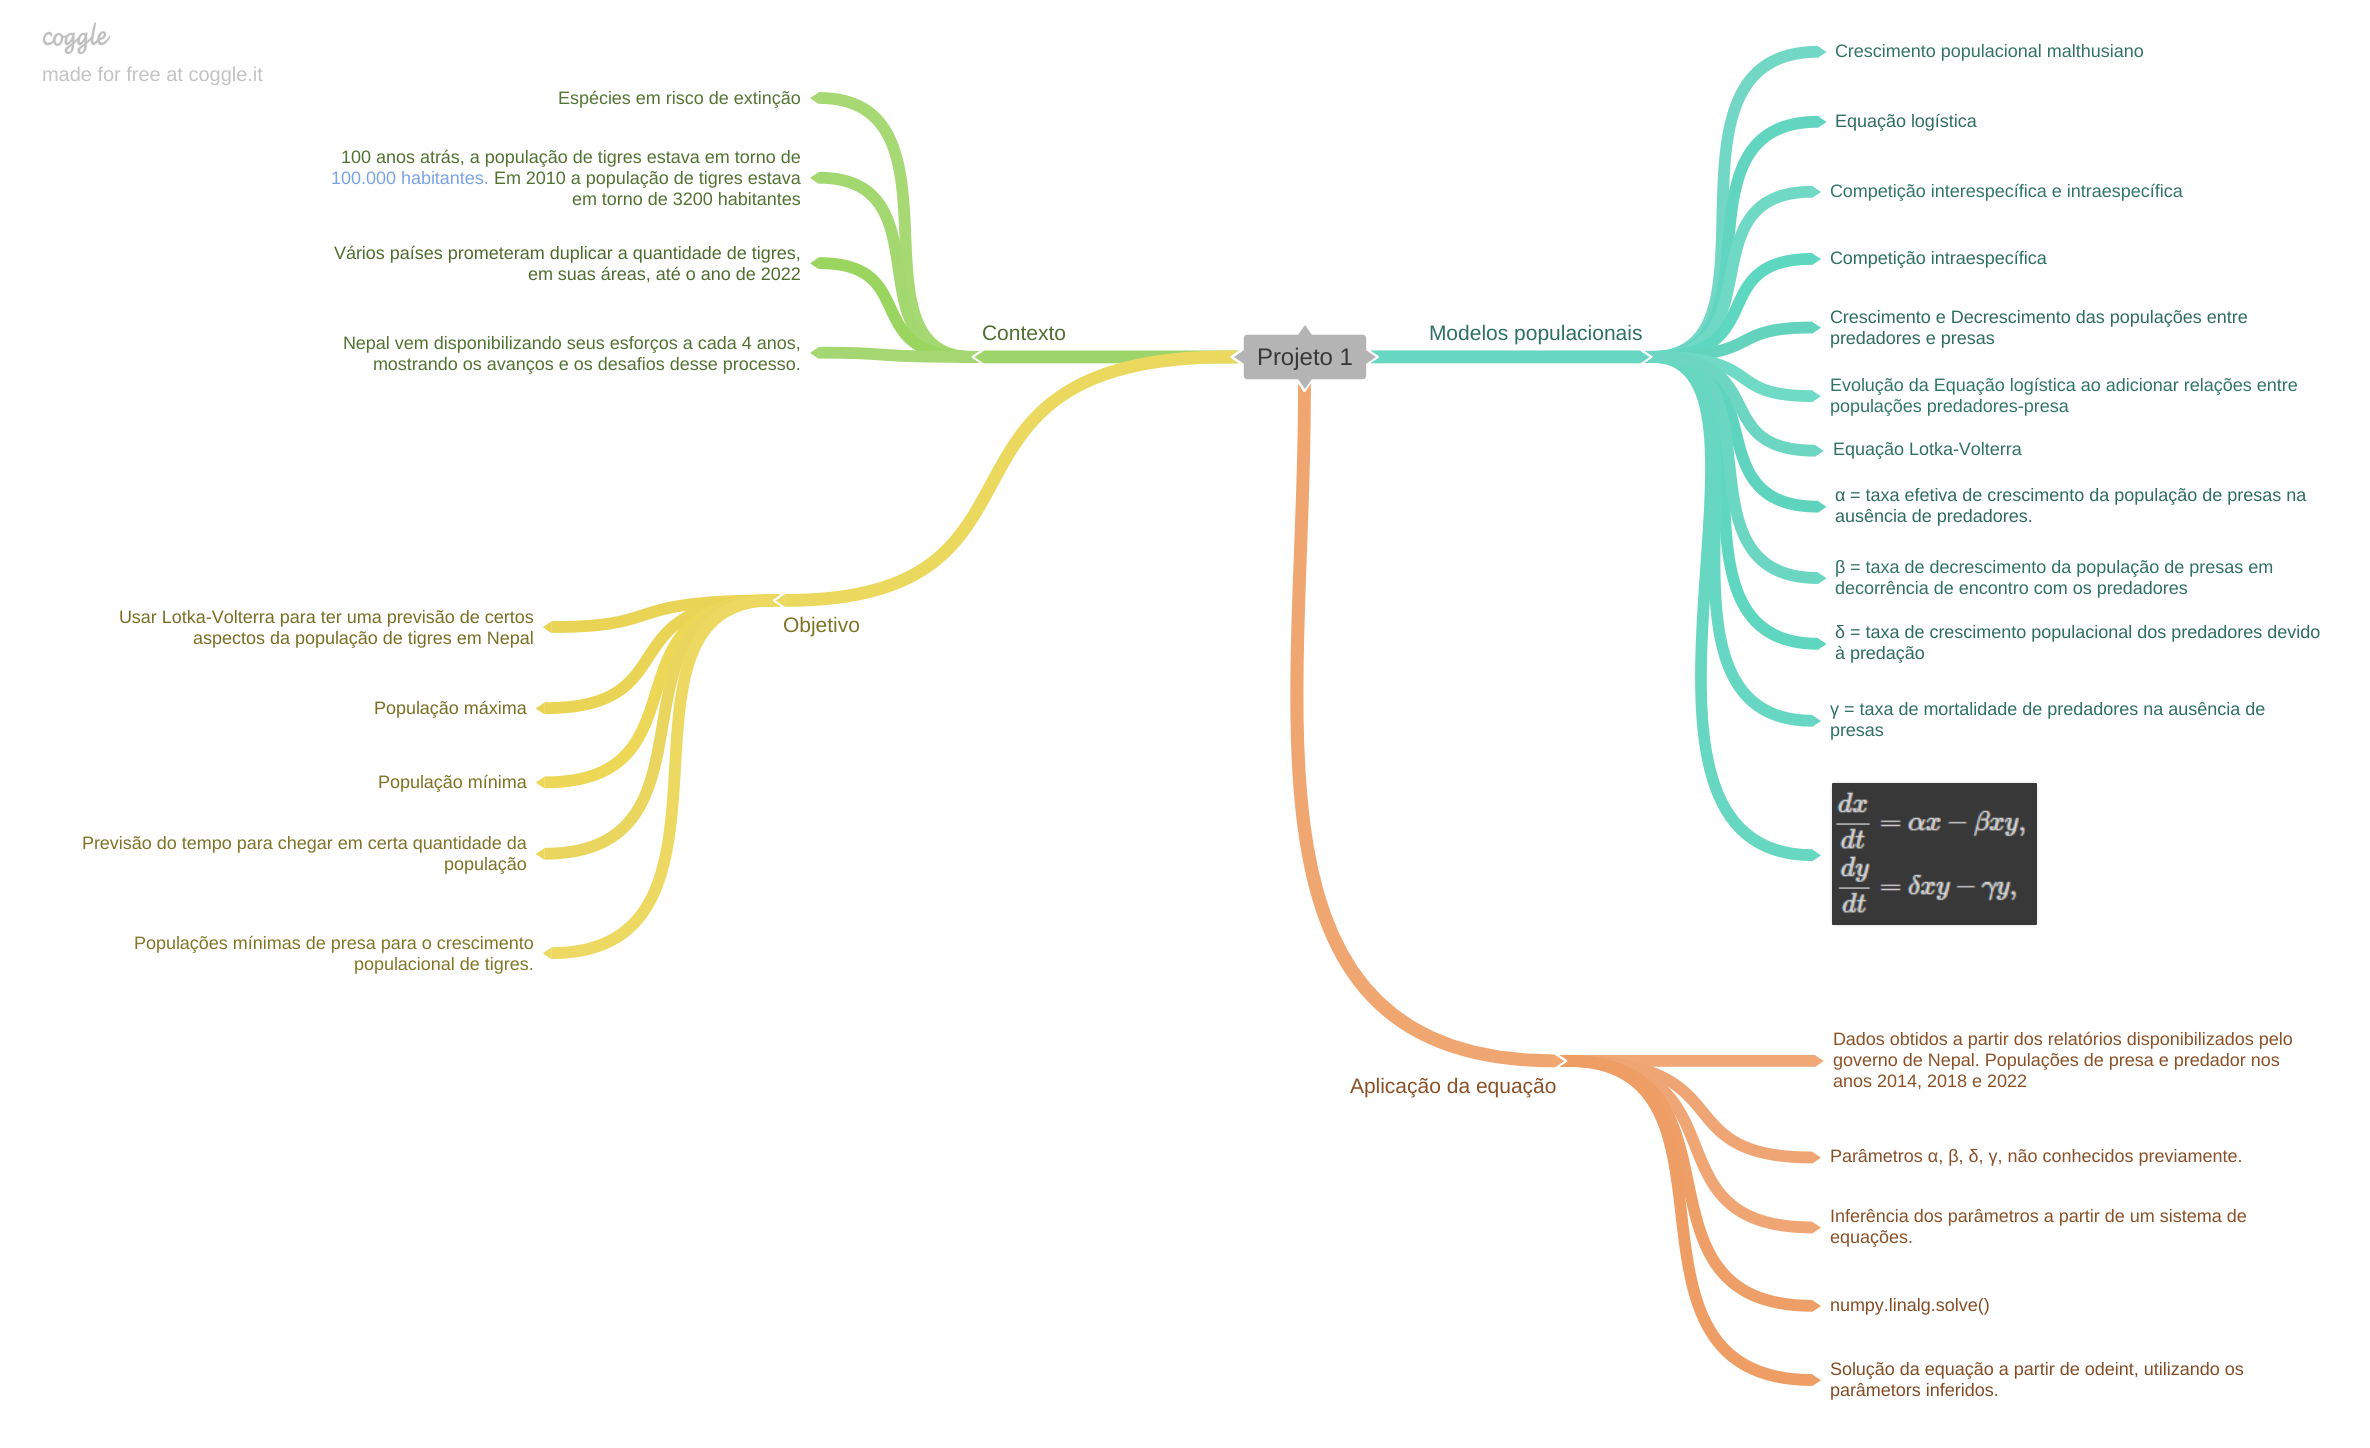

# Modelo

As equações diferenciais do modelo de Lotka-Volterra são as seguintes:

\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&=\delta xy-\gamma y,\end{aligned}

$x$ = número de presas

$y$ = número de predadores

$\frac{dy}{dt}$ e $\frac{dx}{dt}$ representa o crescimênto instantâneo das populações

$t$ = tempo

$\alpha$, $\beta$, $\delta$, $\gamma$ = parâmetros da função

$\alpha$ = taxa efetiva de crescimento da população de presas na ausência de predadores

$\beta$ = taxa de decrescimento da população de presas em decorrência de encontro com os predadores

$\delta$ = taxa de crescimento populacional dos predadores devido à predação

$\gamma$ = taxa de mortalidade de predadores na ausência de presas

Portanto, para utilizar esse sistema precisamos primeiro descobrir os valores das variáveis. Para isso, utilizamos os valores já disponibilizados pelo governo de Nepal para compor os parâmetros.

[2014](https://www.ntnc.org.np/sites/default/files/doc_publication/2018-11/National%20tiger%20status%20report%202013.pdf)

[2018](https://ntnc.org.np/sites/default/files/doc_publication/2019-04/Tiger_prey%20report%202019.pdf)

[2022](https://www.ntnc.org.np/sites/default/files/doc_publication/2022-07/status-of-tigers-and-prey-nepal-2022.pdf)

---


Para o valor $x$ = número de presas, ele foi obtido a partir das seções **Prey Density Estimates**. Para cada reserva natural, nós multiplicamos o valor estimado de presa/km² e o multiplicamos pela área total do local, após isso nós somamos todos esses valores para criar uma média daquele ano, o que nos dá uma estimativa bastante fiel dessa população.

Para o valor $y$ = número de predadores, ele foi obtido a partir das seções **Executive Summary**. Nessa seção, há um valor bruto da estimativa nacional da quantidade de tigres em Nepal.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from scipy.integrate import odeint

In [ ]:
def lotka_volterra(variables, t, params):
    x = variables[0]
    y = variables[1]

    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])

#gets the estimative prey per km² of each area, multiply it by it's total km², then sums all into one value to represent the total prey per year.
def get_total_prey_per_year():
  parsa_wr_km2 = 499
  parsa_wildlife_reserve_preys = [25.32, 50.21, 75.1]

  chitwan_np_km2 = 952
  chitwan_national_park_preys = [73.63, 86.665, 99.7]

  banke_np_km2 = 550
  banke_national_park_preys = [10.27, 21.4, 32.6]

  bardia_np_km2 = 968
  bardia_national_park_preys = [92.6, 91.4, 90.2]

  shuklaphanta_wr_km2 = 305
  shuklaphanta_wildlife_reserve_preys = [78.62, 151.75, 146.2]

  result = [0.0, 0.0, 0.0]
  for i in range(0, 3, 1):
    result[i] += parsa_wildlife_reserve_preys[i] * parsa_wr_km2
    result[i] += chitwan_national_park_preys[i] * chitwan_np_km2
    result[i] += banke_national_park_preys[i] * banke_np_km2
    result[i] += bardia_national_park_preys[i] * bardia_np_km2
    result[i] += shuklaphanta_wildlife_reserve_preys[i] * shuklaphanta_wr_km2
  
  return result

#check if can find x values for 2008-2009
x_series = get_total_prey_per_year()
#this does not include 2008-2009 values for tigers, which was 121
y_series = [198, 235, 355] 

years = [0.0, 4.0, 8.0]

# Resultados do modelo

Para pegar os parametros, nós podemos transformar os nossos valores em conjunto com a equação em um sistema de equações. portanto, temos:
\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy,
\\{\frac {dy}{dt}}&=\delta xy-\gamma y,
\\
\\{\frac {dx}{dt}}1&={\frac {x2-x1}{t2-t1}},
\\{\frac {dx}{dt}}2&={\frac {x3-x2}{t3-t2}},
\\{\frac {dy}{dt}}1&={\frac {y2-y1}{t2-t1}},
\\{\frac {dx}{dt}}2&={\frac {y3-y2}{t3-t2}},
\\
\\{\frac {dx}{dt}}1&=\alpha*x2-\beta*x2*y2,
\\{\frac {dx}{dt}}2&=\alpha*x3-\beta*x3*y3,
\\{\frac {dy}{dt}}1&=\delta*x2*y2-\gamma*y2,
\\{\frac {dy}{dt}}2&=\delta*x3*y3-\gamma*y3,\end{aligned}

Resolvendo esses sistemas, obtemos os parâmetros necessários para resolver a equação. No código abaixo, nós utilizamos o numpy.linalg.solve para resolver esses sistemas.


In [ ]:
#getting the alpha and beta parameters.
A = np.array([[254088.82, -254088.82*235], [282223.9, -282223.9*355]])
B = np.array([13023.5, 7033.77])
X = np.linalg.solve(A, B)
alpha, beta = X

#getting the delta and gamma parameters
A = np.array([[254088.82*235, -235], [282223.9*355, -355]])
B = np.array([9.25, 30])
X = np.linalg.solve(A, B)
delta, gamma = X

#alpha = 0.84152
#beta = 9.94054e-4
#delta = 1.5537e-6
#gamma = 0.26713


params = [alpha, beta, delta, gamma]

y0 = [x_series[0], y_series[0]]



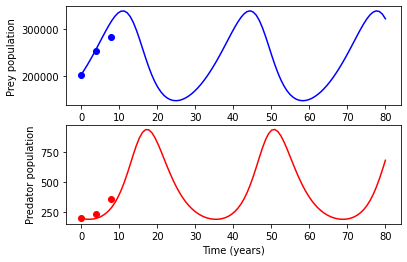

In [ ]:
t = np.linspace(0, 80, 100)


output = odeint(lotka_volterra, y0, t, args=(params,))

f,(ax1,ax2) = plt.subplots(2)

line1 = ax1.scatter(years,x_series, c="b")
line2 = ax2.scatter(years,y_series, c="r")
ax1.set_ylabel("prey (hundreds)")
ax2.set_ylabel("predator (hundreds)")
ax2.set_xlabel("Time")


line1, = ax1.plot(t,output[:,0], color="b")
line2, = ax2.plot(t,output[:,1], color="r")

ax1.set_ylabel("Prey population")
ax2.set_ylabel("Predator population")
ax2.set_xlabel("Time (years)")

plt.show()

# Conclusões

Portanto, os parâmetros escolhidos ainda precisam ser otimizados, mas o resultado já nos dá uma estimativa boa do limite máxima de tigres que a área suporta, e a periodicidade em que a população de predadora e presa aumenta e diminui.

É esperado que a população de tigres em Nepal atinja o máximo, de quase 1000 tigres, após 18-20 anos do começ, e que a cada 35 anos a população volte a ficar pequena para depois crescer, por conta da diminuição de presas.